## Traffic Crashes in Chicago

Urban traffic accidents pose significant challenges, leading to considerable human suffering and economic losses. In Chicago, the annual toll includes numerous traffic collisions that result in injuries, fatalities, and substantial property damage. Identifying the factors that lead to these incidents and forecasting their severity are crucial steps for city planners and public safety officials aiming to enhance road safety. This initiative utilizes the City of Chicago's Traffic Crashes dataset to develop predictive models that pinpoint high-risk situations and offer actionable insights.

## Project Overview

This initiative seeks to examine Chicago's traffic accident data to forecast the leading contributory causes of these incidents. By employing machine learning algorithms, the project aims to pinpoint critical factors that lead to accidents, thereby guiding policy decisions to enhance traffic safety and mitigate future collisions. The dataset encompasses various attributes related to accidents, including weather conditions, lighting, and roadway surface states. The primary focus is on the 'Primary Contributory Cause,' approached as a multi-class classification challenge.

## Business Understanding

Traffic accidents represent a critical public safety concern. Identifying the factors that lead to these incidents enables city planners, traffic engineers, and policymakers to implement more effective safety measures. This project aims to develop a model that accurately predicts the primary contributory causes of accidents, providing actionable insights to reduce their frequency and severity.

## Data Understanding

he dataset for this project is sourced from the City of Chicago's Traffic Crashes database, which provides comprehensive details for each incident, including:

- Crash Date: Specifies the exact date and time when the crash
occurred.
- Traffic Control Device: Identifies the type of traffic control mechanism in place at the location of the crash.
- Weather Conditions: Describes the atmospheric conditions present at the time of the accident.
- Roadway Surface Conditions: Indicates the state of the road surface during the crash.
- Lighting Conditions: Details the level of illumination at the crash scene.


## Data Preparation

## Importing Libraries

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from numbers import Number

## Reading and accessing the data

In [4]:
df = pd.read_csv("Traffic_Crashes.csv")
print(df.head())
print(df.info())
print(df.describe())

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...              NaN   
1  2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...              NaN   
2  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
3  7ebf015016f83d09b321afd671a836d6b148330535d5df...              NaN   
4  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  09/05/2023 07:05:00 PM                  30         TRAFFIC SIGNAL   
1  09/22/2023 06:45:00 PM                  50            NO CONTROLS   
2  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
3  08/09/2023 11:00:00 PM                  30            NO CONTROLS   
4  08/18/2023 12:50:00 PM                  15                  OTHER   

       DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR                  

In [5]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

## Check for any Missing values

In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

CRASH_DATE_EST_I                 13291
LANE_CNT                         11394
REPORT_TYPE                        342
INTERSECTION_RELATED_I           11313
NOT_RIGHT_OF_WAY_I               13657
HIT_AND_RUN_I                    10489
PRIM_CONTRIBUTORY_CAUSE              1
SEC_CONTRIBUTORY_CAUSE               1
STREET_NO                            1
STREET_DIRECTION                     4
STREET_NAME                          2
BEAT_OF_OCCURRENCE                   3
PHOTOS_TAKEN_I                   14120
STATEMENTS_TAKEN_I               13957
DOORING_I                        14259
WORK_ZONE_I                      14201
WORK_ZONE_TYPE                   14214
WORKERS_PRESENT_I                14260
NUM_UNITS                            1
MOST_SEVERE_INJURY                  31
INJURIES_TOTAL                      31
INJURIES_FATAL                      31
INJURIES_INCAPACITATING             31
INJURIES_NON_INCAPACITATING         31
INJURIES_REPORTED_NOT_EVIDENT       31
INJURIES_NO_INDICATION   

## Check for Duplicte values

In [7]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [CRASH_RECORD_ID, CRASH_DATE_EST_I, CRASH_DATE, POSTED_SPEED_LIMIT, TRAFFIC_CONTROL_DEVICE, DEVICE_CONDITION, WEATHER_CONDITION, LIGHTING_CONDITION, FIRST_CRASH_TYPE, TRAFFICWAY_TYPE, LANE_CNT, ALIGNMENT, ROADWAY_SURFACE_COND, ROAD_DEFECT, REPORT_TYPE, CRASH_TYPE, INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, DAMAGE, DATE_POLICE_NOTIFIED, PRIM_CONTRIBUTORY_CAUSE, SEC_CONTRIBUTORY_CAUSE, STREET_NO, STREET_DIRECTION, STREET_NAME, BEAT_OF_OCCURRENCE, PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I, WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I, NUM_UNITS, MOST_SEVERE_INJURY, INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION, INJURIES_UNKNOWN, CRASH_HOUR, CRASH_DAY_OF_WEEK, CRASH_MONTH, LATITUDE, LONGITUDE, LOCATION]
Index: []

[0 rows x 48 columns]


## Dealing with missing values

In [8]:
df['WEATHER_CONDITION'].fillna(df['WEATHER_CONDITION'].mode()[0], inplace=True)
df['LIGHTING_CONDITION'].fillna(df['LIGHTING_CONDITION'].mode()[0], inplace=True)
df['ROADWAY_SURFACE_COND'].fillna(df['ROADWAY_SURFACE_COND'].mode()[0], inplace=True)
df['TRAFFIC_CONTROL_DEVICE'].fillna(df['TRAFFIC_CONTROL_DEVICE'].mode()[0], inplace=True)
df['DEVICE_CONDITION'].fillna(df['DEVICE_CONDITION'].mode()[0], inplace=True)
df['DEVICE_CONDITION'].fillna(df['DEVICE_CONDITION'].mode()[0], inplace=True)
df['INTERSECTION_RELATED_I'].fillna(df['INTERSECTION_RELATED_I'].mode()[0], inplace=True)
df['NOT_RIGHT_OF_WAY_I'].fillna(df['NOT_RIGHT_OF_WAY_I'].mode()[0], inplace=True)
df['MOST_SEVERE_INJURY'].fillna(df['MOST_SEVERE_INJURY'].mode()[0], inplace=True)
df.drop(['PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
         'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'STREET_NO', 'STREET_DIRECTION',
         'STREET_NAME', 'BEAT_OF_OCCURRENCE','CRASH_DATE_EST_I'], axis=1, inplace=True)
df['HIT_AND_RUN_I'].fillna(df['HIT_AND_RUN_I'].mode()[0], inplace=True)
df['LANE_CNT'].fillna(df['LANE_CNT'].median(), inplace=True)
df['LATITUDE'].fillna(df['LATITUDE'].median(), inplace=True)
df['LONGITUDE'].fillna(df['LONGITUDE'].median(), inplace=True)
injury_columns = [
    'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
    'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
    'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'
]
df[injury_columns] = df[injury_columns].fillna(0)
df['LOCATION'].fillna(method='ffill', inplace=True)
df['REPORT_TYPE'].fillna(df['REPORT_TYPE'].mode()[0], inplace=True)
df['LOCATION'].fillna(method='bfill', inplace=True)

<ipython-input-8-f502b43b8812>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WEATHER_CONDITION'].fillna(df['WEATHER_CONDITION'].mode()[0], inplace=True)
<ipython-input-8-f502b43b8812>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [9]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

PRIM_CONTRIBUTORY_CAUSE    1
SEC_CONTRIBUTORY_CAUSE     1
NUM_UNITS                  1
CRASH_HOUR                 1
CRASH_DAY_OF_WEEK          1
CRASH_MONTH                1
dtype: int64


## Feature Engineering

The dataset has pre-engineered features, such as CRASH_HOUR and CRASH_MONTH. To identify the top 10 features most relevant to our target variable, we will empdeployloy a machine learning model.

In the following cell, we will implement a Logistic Regression model with preprocessing pipelines to efficiently handle our large dataset. This approach will also prepare both categorical and numerical features for modeling.

In [15]:

df_sampled = df.sample(frac=0.01, random_state=42)

X = df_sampled.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = df_sampled['PRIM_CONTRIBUTORY_CAUSE']


categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = LogisticRegression(max_iter=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

## Next we xtract coefficients by creating features then analyze the importance of each feature.

Feature Name Construction
The code reconstructs feature names after preprocessing, including those generated through one-hot encoding for categorical variables.

Model Coefficients
It retrieves the coefficients from the trained Logistic Regression model to analyze the contribution of each feature to the predictions.

Feature Importance
By sorting the coefficients based on their absolute values, the code highlights the most influential features in the model, offering insights into the key factors driving the target variable.


In [16]:

feature_names = []

for col in numerical_cols:
    feature_names.append(col)

for col in categorical_cols:
    categories = preprocessor.named_transformers_['cat']['onehot'].categories_[categorical_cols.get_loc(col)]
    feature_names.extend([f"{col}_{category}" for category in categories])

coefficients = model.coef_[0]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print(importance_df.head(20))

                                               Feature  Coefficient  \
256                       DEVICE_CONDITION_NO CONTROLS    -0.318587   
250                 TRAFFIC_CONTROL_DEVICE_NO CONTROLS    -0.312541   
452  LOCATION_POINT (-87.585945066953 41.744151639042)     0.300816   
11                                   CRASH_DAY_OF_WEEK    -0.294536   
272                             FIRST_CRASH_TYPE_ANGLE     0.285345   
8                               INJURIES_NO_INDICATION     0.254969   
283                           FIRST_CRASH_TYPE_TURNING     0.249495   
15                                      CRASH_HOUR_sin     0.237472   
319                                 DAMAGE_OVER $1,500     0.215492   
20                                     CRASH_MONTH_cos     0.212613   
12                                         CRASH_MONTH    -0.211625   
318                               DAMAGE_$501 - $1,500    -0.194453   
282          FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION    -0.193910   
10    


Let's convert time-related features into a format that effectively represents their cyclic nature, which can enhance both the performance and interpretability of our machine learning models.

In [12]:
df['CRASH_HOUR_sin'] = np.sin(2 * np.pi * df['CRASH_HOUR'] / 24)
df['CRASH_HOUR_cos'] = np.cos(2 * np.pi * df['CRASH_HOUR'] / 24)

df['CRASH_DAY_OF_WEEK_sin'] = np.sin(2 * np.pi * df['CRASH_DAY_OF_WEEK'] / 7)
df['CRASH_DAY_OF_WEEK_cos'] = np.cos(2 * np.pi * df['CRASH_DAY_OF_WEEK'] / 7)

df['CRASH_MONTH_sin'] = np.sin(2 * np.pi * df['CRASH_MONTH'] / 12)
df['CRASH_MONTH_cos'] = np.cos(2 * np.pi * df['CRASH_MONTH'] / 12)

## Enhancing Model Predictive Power
Additional engineered features can be integrated into the raw dataset to improve the model's ability to predict the primary contributory causes of traffic accidents by incorporating crucial contextual information.

Features such as

## Weekend:
Traffic patterns during weekends often differ significantly from weekdays, influencing both the likelihood and types of crashes. Including a feature that identifies whether a crash occurred on a weekend allows the model to better distinguish between these patterns.

## Speed Weather Interaction:
The impact of speed limits on crashes can vary depending on weather conditions. For instance, high speed limits are particularly risky in adverse weather. This interaction feature enables the model to capture the relationship between speed and weather, improving predictive accuracy.

In [18]:
df['Speed_Weather_Interaction'] = df['POSTED_SPEED_LIMIT'] * df['WEATHER_CONDITION'].factorize()[0]
df['Is_Weekend'] = df['CRASH_DAY_OF_WEEK'].apply(lambda x: 1 if x in [6, 7] else 0)

Let's analyze the frequency of causes to assess how closely each feature correlates with the target variable.

In [19]:
cause_counts = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
print(cause_counts)

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 5252
FAILING TO YIELD RIGHT-OF-WAY                                                       1689
FOLLOWING TOO CLOSELY                                                               1442
NOT APPLICABLE                                                                       763
IMPROPER OVERTAKING/PASSING                                                          744
IMPROPER LANE USAGE                                                                  638
IMPROPER BACKING                                                                     586
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  538
FAILING TO REDUCE SPEED TO AVOID CRASH                                               526
IMPROPER TURNING/NO SIGNAL                                                           483
DISREGARDING TRAFFIC SIGNALS                                                         2

## Binning Rare Causes:
This process reduces the number of categories the model needs to differentiate, particularly for categories with very few samples, helping to prevent overfitting.

In [20]:
threshold = 0.01 * len(df)
rare_causes = cause_counts[cause_counts < threshold].index
df['PRIM_CONTRIBUTORY_CAUSE_BINNED'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace(rare_causes, 'Other')

## Filtering to Top N Causes:
Focuses on the most frequent causes, which are likely to have the greatest impact on your analysis.

In [21]:
top_n_causes = df['PRIM_CONTRIBUTORY_CAUSE_BINNED'].value_counts().head(10).index
df = df[df['PRIM_CONTRIBUTORY_CAUSE_BINNED'].isin(top_n_causes)]

## Mode-Based Feature:
Introduces a contextual feature to help the model capture the relationship between weather conditions and speed limits.








In [22]:
df['Weather_Condition_Mode'] = df.groupby('POSTED_SPEED_LIMIT')['WEATHER_CONDITION'].transform(lambda x: x.mode()[0])

Drop columns we don't need

In [23]:
df.drop(['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'POSTED_SPEED_LIMIT'], axis=1, inplace=True)
y = df['PRIM_CONTRIBUTORY_CAUSE_BINNED']


Since we have already defined our X and y, we need to redefine them to ensure the target variable aligns with the newly created features.

In [24]:
X = df.drop(['PRIM_CONTRIBUTORY_CAUSE', 'PRIM_CONTRIBUTORY_CAUSE_BINNED'], axis=1)
y = df['PRIM_CONTRIBUTORY_CAUSE_BINNED']

## EDA Analysis

The three analysis below were deplyoyed in this instance


## Univariate Analysis:
Histograms and box plots were utilized to analyze the distribution of numerical features and explore their association with the target variable.



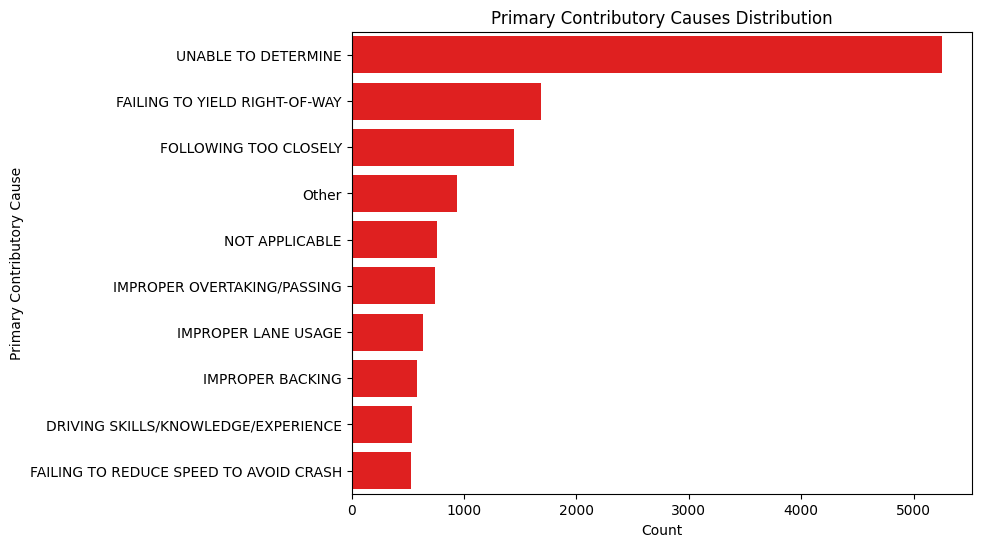

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(
    y='PRIM_CONTRIBUTORY_CAUSE_BINNED',
    data=df,
    order=df['PRIM_CONTRIBUTORY_CAUSE_BINNED'].value_counts().index,
    color='red'
)
plt.title('Primary Contributory Causes Distribution')
plt.xlabel('Count')
plt.ylabel('Primary Contributory Cause')
plt.show()

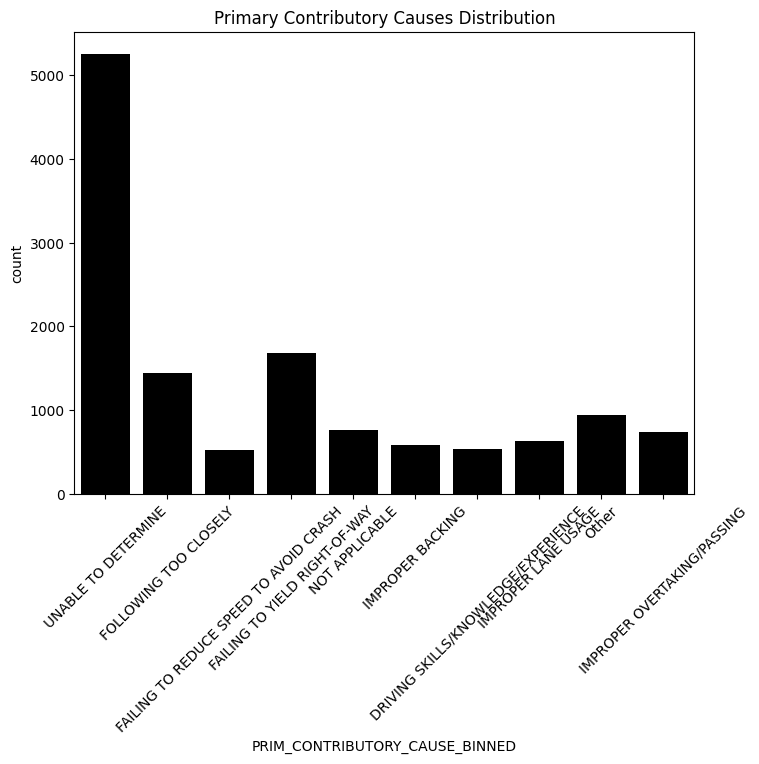

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PRIM_CONTRIBUTORY_CAUSE_BINNED', color='black')  # Set the bar color to black
plt.title('Primary Contributory Causes Distribution')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis:

Pair plots and heatmaps below are used to examine the relationships between features and their association with the Primary Contributory Cause.

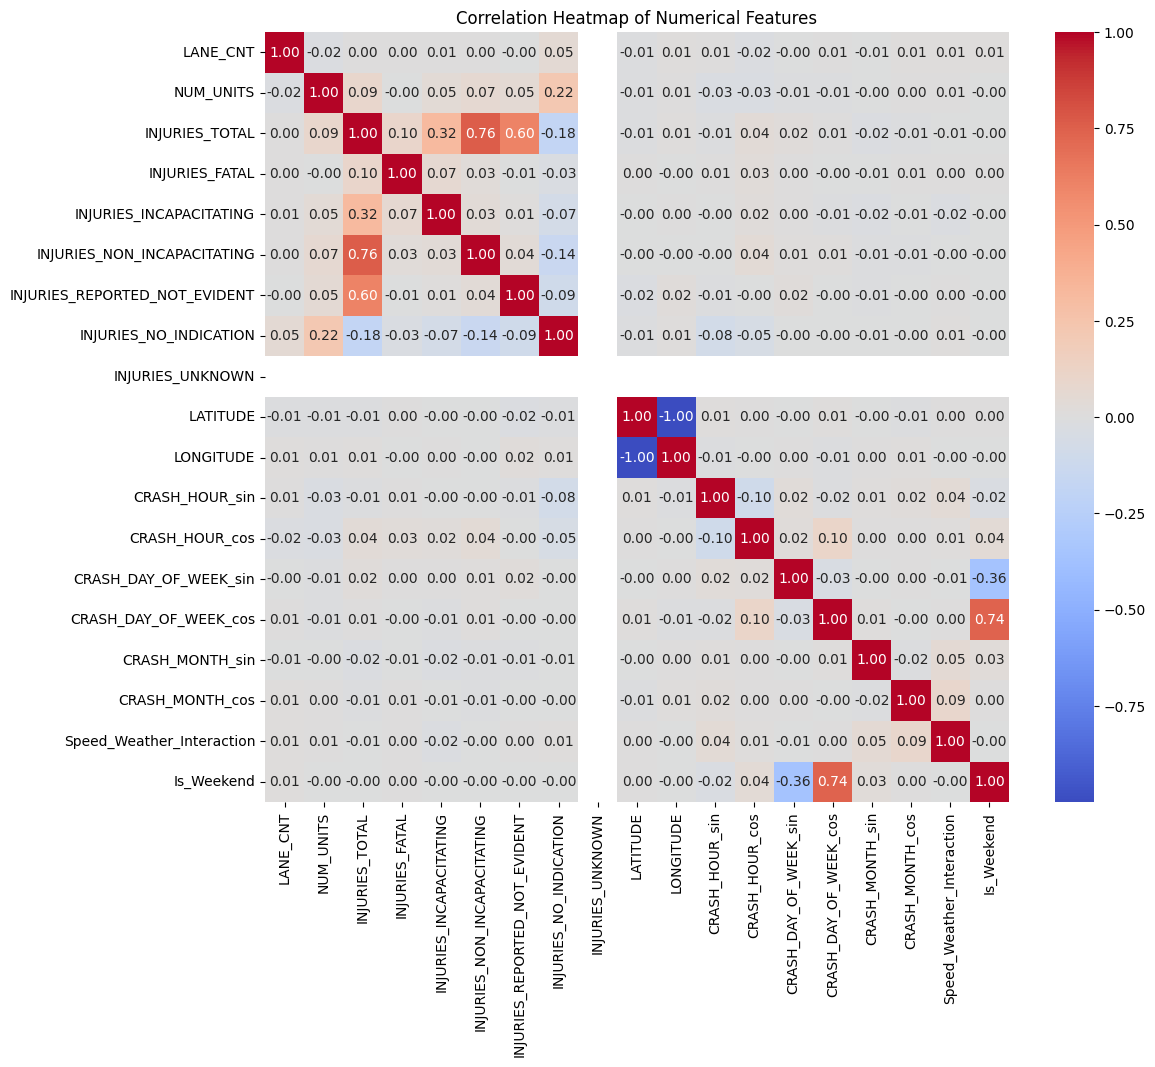

In [36]:
# Redefine numerical_cols to include only existing columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Now calculate the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

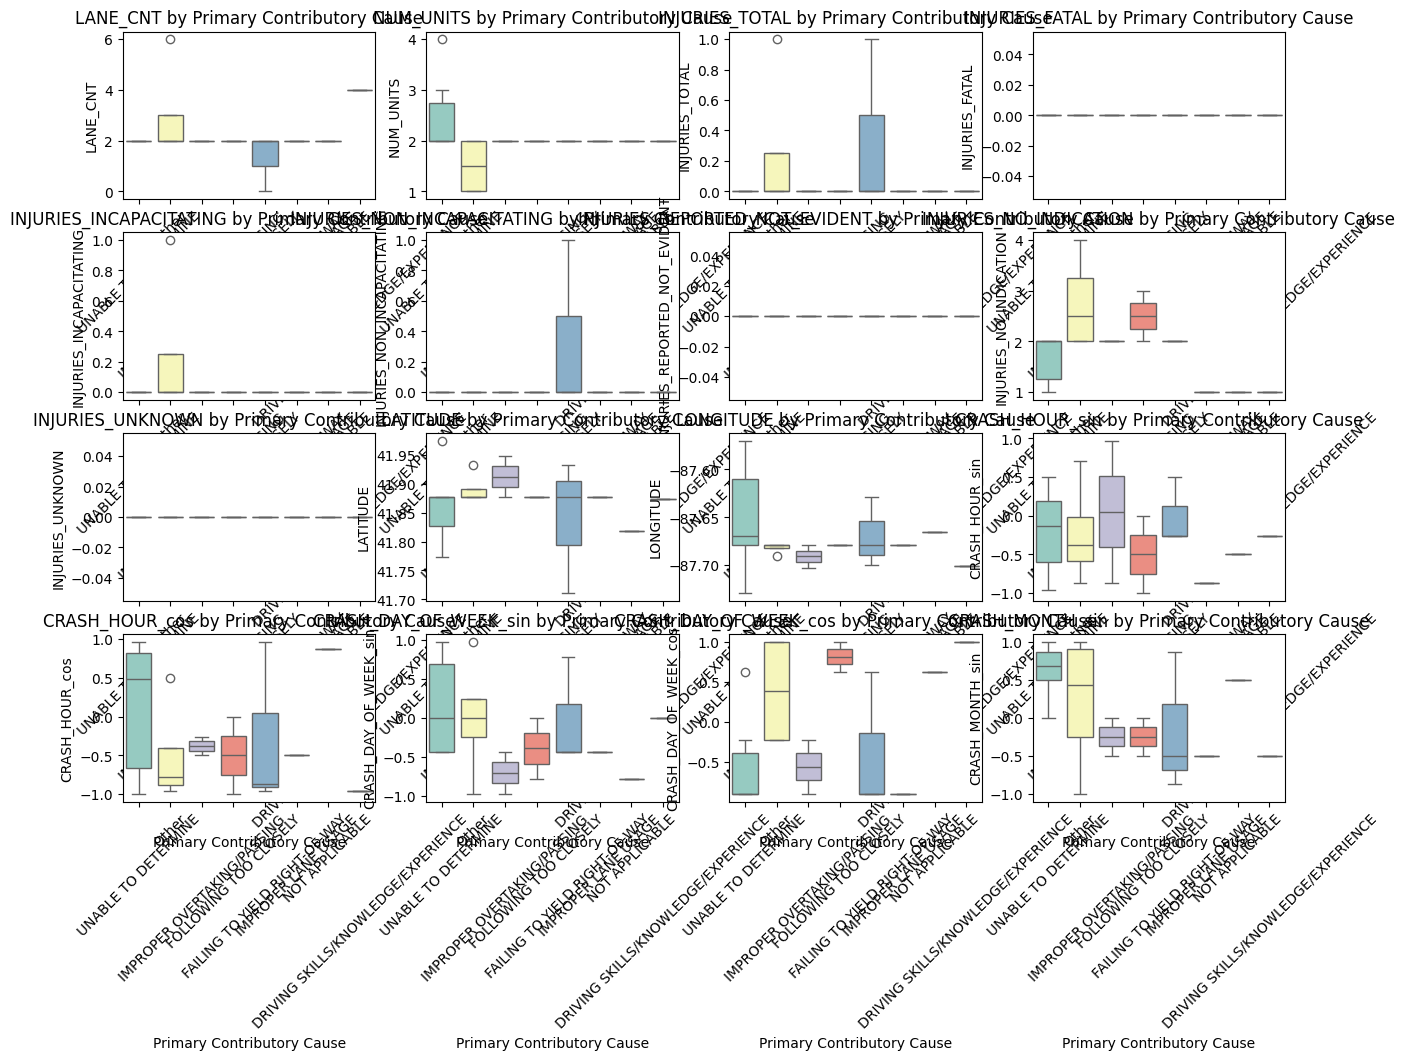

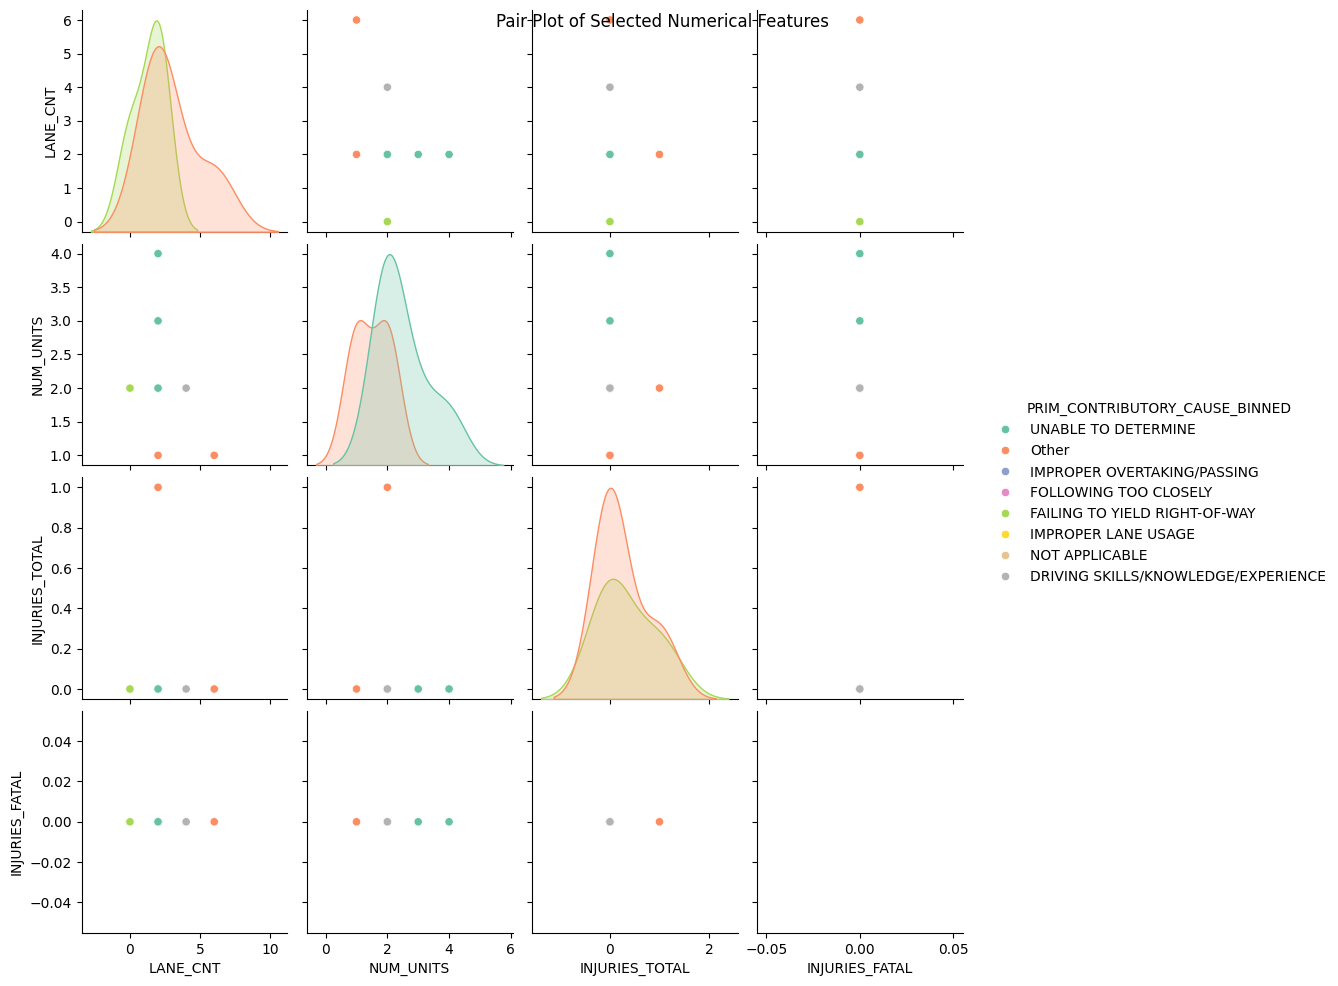

In [40]:
import warnings # Import the warnings module

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
limited_samples = 20
df_sampled = df.sample(n=limited_samples, random_state=42)

# ... (rest of your code)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:16]):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='PRIM_CONTRIBUTORY_CAUSE_BINNED', y=col, data=df_sampled, palette="Set3")
    plt.title(f'{col} by Primary Contributory Cause')
    plt.xlabel('Primary Contributory Cause')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

selected_numerical_cols = numerical_cols[:4]
sns.pairplot(df_sampled[selected_numerical_cols.tolist() + ['PRIM_CONTRIBUTORY_CAUSE_BINNED']],
             hue='PRIM_CONTRIBUTORY_CAUSE_BINNED',
             diag_kind='kde',
             palette="Set2")
plt.suptitle('Pair Plot of Selected Numerical Features')
plt.show()

## Multivariate Analysis:


To analyze how combinations of features influence accident outcomes we use interaction plots

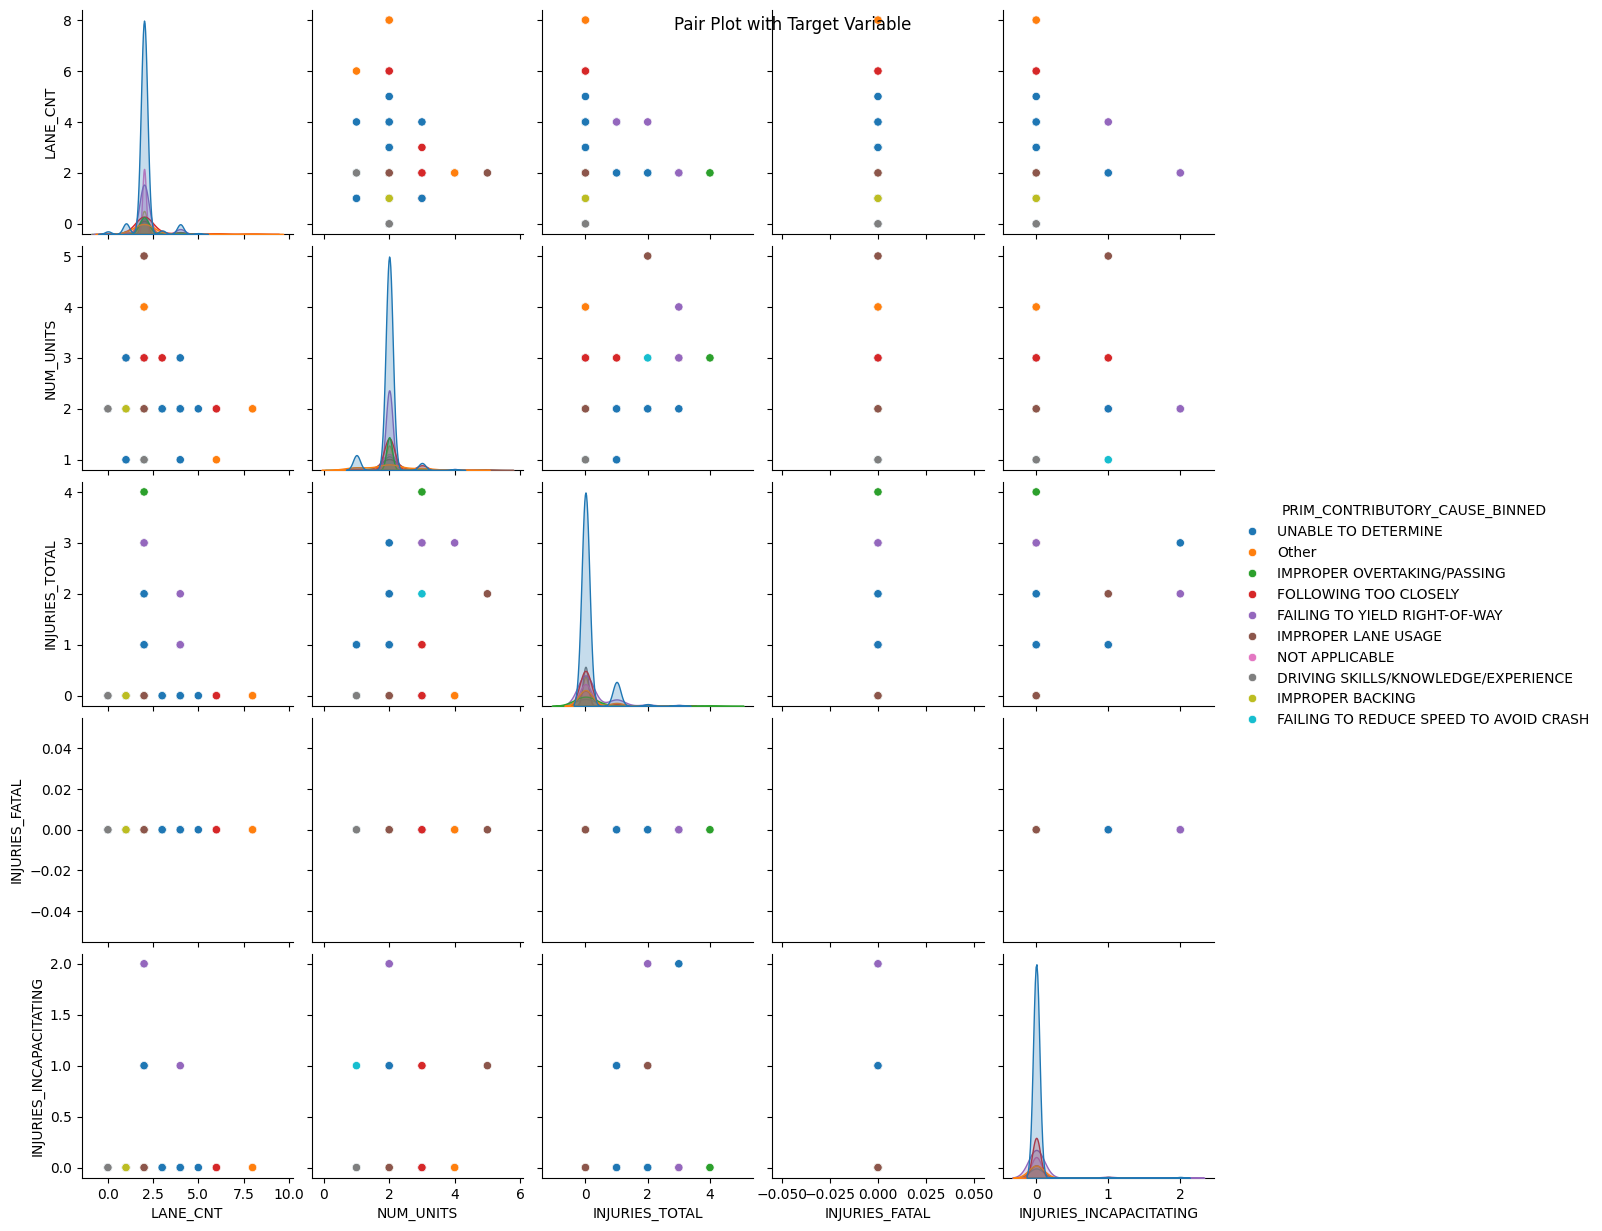

In [41]:
df_sampled = df.sample(frac=0.05, random_state=42)
sns.pairplot(df_sampled, hue='PRIM_CONTRIBUTORY_CAUSE_BINNED', vars=numerical_cols[:5])
plt.suptitle('Pair Plot with Target Variable')
plt.show()

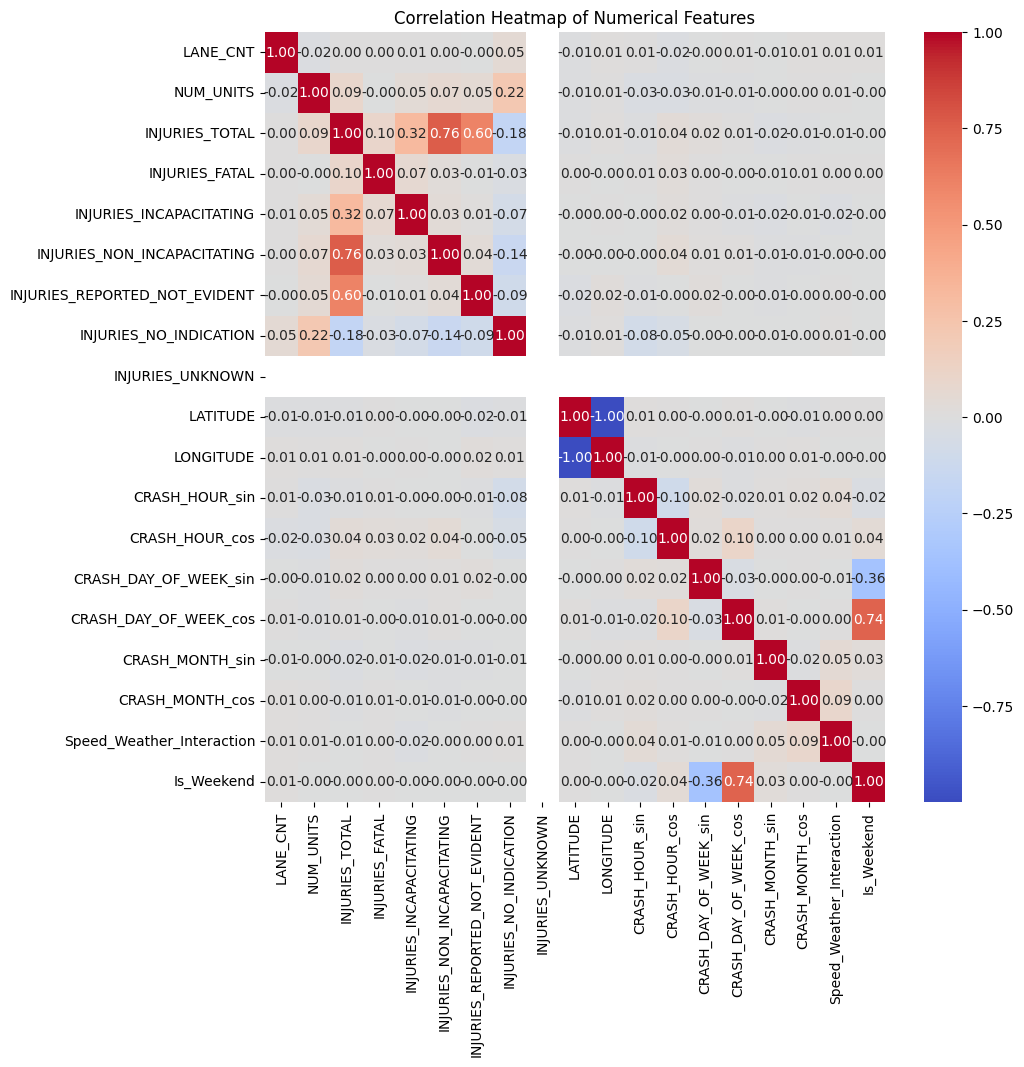

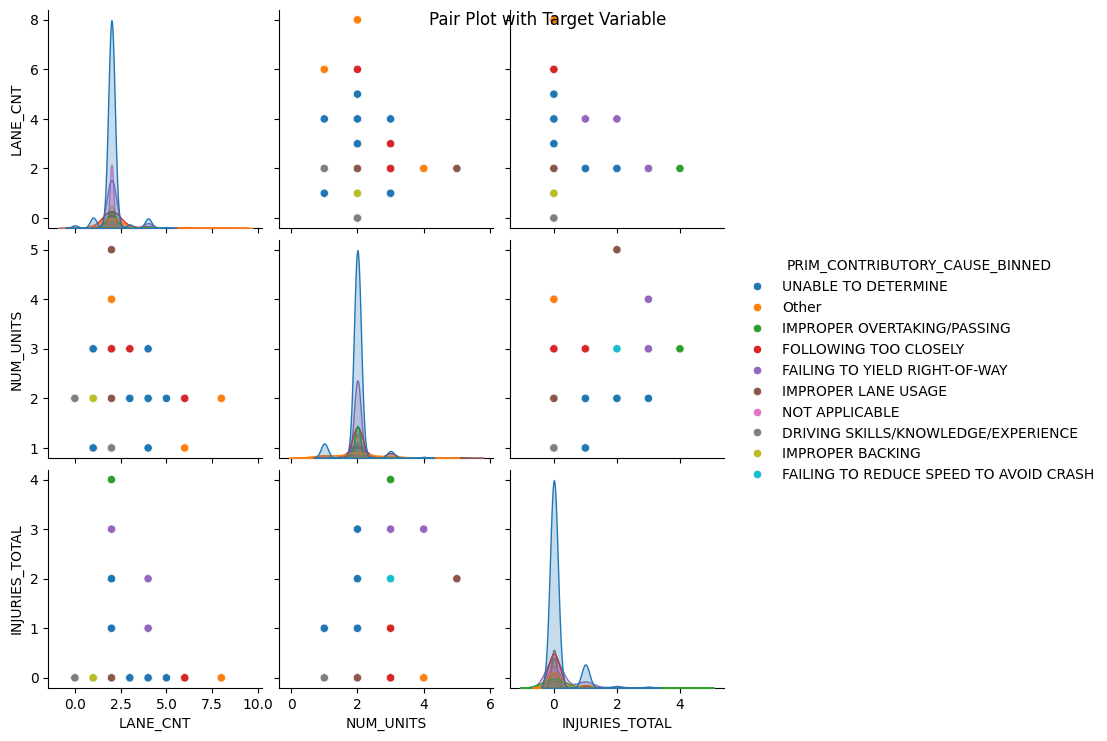

In [42]:
plt.figure(figsize=(10, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

df_sampled = df.sample(frac=0.05, random_state=42)
sns.pairplot(df_sampled, hue='PRIM_CONTRIBUTORY_CAUSE_BINNED', vars=numerical_cols[:3])
plt.suptitle('Pair Plot with Target Variable')
plt.show()

## Data Modeling

Several machine learning models will be trained and evaluated, including:
1. Logistic Regression
2. Regularized Logistic Regression
3. Decision Trees
4. Random Forest
5. Gradient Boosting

## Define the Baseline model

In this project we will use Logistic Regression as our Baseline model. We will use pipeline preprocessor, by defining then split, train and evaluate the model.

In [44]:
from sklearn.metrics import accuracy_score, classification_report
df_sampled = df.sample(frac=0.01, random_state=42)

X = df_sampled.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = df_sampled['PRIM_CONTRIBUTORY_CAUSE']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100, random_state=42))
])

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Baseline Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Baseline Model Accuracy: 0.7037
Classification Report:
                                                                    precision    recall  f1-score   support

                                   DRIVING ON WRONG SIDE/WRONG WAY       0.00      0.00      0.00         1
                               DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       0.00      0.00      0.00         1
                                     EQUIPMENT - VEHICLE CONDITION       0.00      0.00      0.00         0
                            FAILING TO REDUCE SPEED TO AVOID CRASH       0.00      0.00      0.00         1
                                     FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         3
                                             FOLLOWING TOO CLOSELY       0.75      1.00      0.86         3
                   HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)       0.00      0.00      0.00         1
                                                  IMPROPER BACKING       0.00   

The above output gives us the precision, F1-score and accuracy of our baseline model.

Building models for model selection

In [46]:
!pip install scikit-learn
# Import necessary libraries
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
df_sampled = df.sample(frac=0.01, random_state=42)
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Ridge Classifier': RidgeClassifier(),
    'Lasso Logistic Regression': LogisticRegression(penalty='l1', solver='saga', max_iter=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


for name, model in models.items():
# Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy')


    pipeline.fit(X_train, y_train)


    y_pred = pipeline.predict(X_test)
    # Evaluate the model
    print(f'Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('\n')

Test Set Accuracy: 0.7037
                                                                    precision    recall  f1-score   support

                                   DRIVING ON WRONG SIDE/WRONG WAY       0.00      0.00      0.00         1
                               DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       0.00      0.00      0.00         1
                                     EQUIPMENT - VEHICLE CONDITION       0.00      0.00      0.00         0
                            FAILING TO REDUCE SPEED TO AVOID CRASH       0.00      0.00      0.00         1
                                     FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         3
                                             FOLLOWING TOO CLOSELY       0.75      1.00      0.86         3
                   HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)       0.00      0.00      0.00         1
                                                  IMPROPER BACKING       0.00      0.00      0.00         1
 

The above are the classification metrics of our models before Tuning

## Model Tuning
Hyperparameter tuning is conducted to optimize each model:

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1],
        'model__solver': ['lbfgs', 'liblinear']
    },
    'Ridge Classifier': {
        'model__alpha': [0.1, 1, 10]
    },
    'Lasso Logistic Regression': {
        'model__C': [0.1, 1, 10]
    },
    'Decision Tree': {
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5]
    },
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'model__learning_rate': [0.01, 0.1],
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5]
    }
}

best_models = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    random_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[name],
                                       n_iter=5, cv=3, scoring='accuracy', n_jobs=-1,
                                       random_state=42)

    random_search.fit(X_train, y_train)

    best_models[name] = random_search.best_estimator_

for name, model in best_models.items():
    print(f"Best parameters for {name}: {model.get_params()['model']}")

Best parameters for Logistic Regression: LogisticRegression(C=1, random_state=42, solver='liblinear')
Best parameters for Ridge Classifier: RidgeClassifier(alpha=0.1)
Best parameters for Lasso Logistic Regression: LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')
Best parameters for Decision Tree: DecisionTreeClassifier(max_depth=10, random_state=42)
Best parameters for Random Forest: RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       n_jobs=-1, random_state=42)
Best parameters for Gradient Boosting: GradientBoostingClassifier(n_estimators=200, random_state=42)


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np


param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear']
    },
    'Ridge Classifier': {
        'model__alpha': [0.01, 0.1, 1, 10]
    },
    'Lasso Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10]
    },
    'Decision Tree': {
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10],
        'model__min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'model__learning_rate': [0.01, 0.1],
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5]
    }
}

best_models = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    random_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[name],
                                       n_iter=10, cv=3, scoring='accuracy', n_jobs=-1,
                                       random_state=42)

    random_search.fit(X_train, y_train)

    best_models[name] = random_search.best_estimator_

for name, model in best_models.items():
    print(f"Best parameters for {name}: {model.get_params()['model']}")

Best parameters for Logistic Regression: LogisticRegression(C=10, random_state=42, solver='liblinear')
Best parameters for Ridge Classifier: RidgeClassifier(alpha=0.01)
Best parameters for Lasso Logistic Regression: LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='saga')
Best parameters for Decision Tree: DecisionTreeClassifier(random_state=42)
Best parameters for Random Forest: RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
Best parameters for Gradient Boosting: GradientBoostingClassifier(random_state=42)


Model: Logistic Regression
                                                                    precision    recall  f1-score   support

                                   DRIVING ON WRONG SIDE/WRONG WAY       0.00      0.00      0.00         1
                               DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       0.00      0.00      0.00         1
                            FAILING TO REDUCE SPEED TO AVOID CRASH       0.00      0.00      0.00         1
                                     FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         3
                                             FOLLOWING TOO CLOSELY       0.75      1.00      0.86         3
                   HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)       0.00      0.00      0.00         1
                                                  IMPROPER BACKING       0.00      0.00      0.00         1
                                               IMPROPER LANE USAGE       0.00      0.00      0.00         1


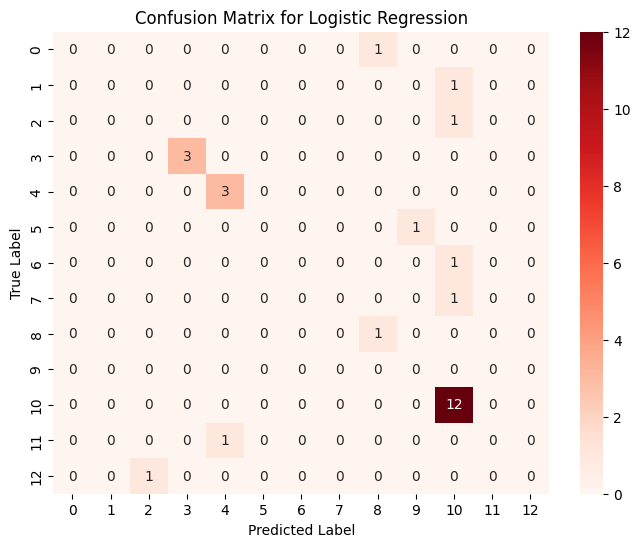

Model: Ridge Classifier
                                                                    precision    recall  f1-score   support

                                   DRIVING ON WRONG SIDE/WRONG WAY       0.00      0.00      0.00         1
                               DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       1.00      1.00      1.00         1
                                     EQUIPMENT - VEHICLE CONDITION       0.00      0.00      0.00         0
                            FAILING TO REDUCE SPEED TO AVOID CRASH       0.50      1.00      0.67         1
                                     FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         3
                                             FOLLOWING TOO CLOSELY       0.75      1.00      0.86         3
                   HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)       0.00      0.00      0.00         1
                                                  IMPROPER BACKING       1.00      1.00      1.00         1
   

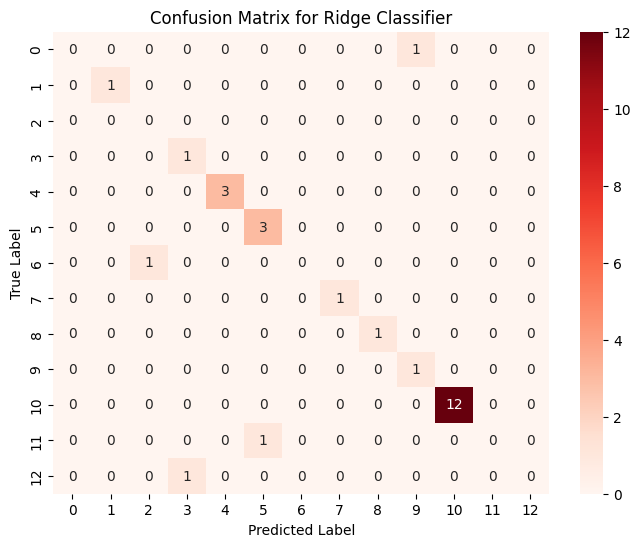

Model: Lasso Logistic Regression
                                                                    precision    recall  f1-score   support

                                   DRIVING ON WRONG SIDE/WRONG WAY       0.00      0.00      0.00         1
                               DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       0.00      0.00      0.00         1
                            FAILING TO REDUCE SPEED TO AVOID CRASH       0.00      0.00      0.00         1
                                     FAILING TO YIELD RIGHT-OF-WAY       0.00      0.00      0.00         3
                                             FOLLOWING TOO CLOSELY       0.00      0.00      0.00         3
                   HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)       0.00      0.00      0.00         1
                                                  IMPROPER BACKING       0.00      0.00      0.00         1
                                               IMPROPER LANE USAGE       0.00      0.00      0.00     

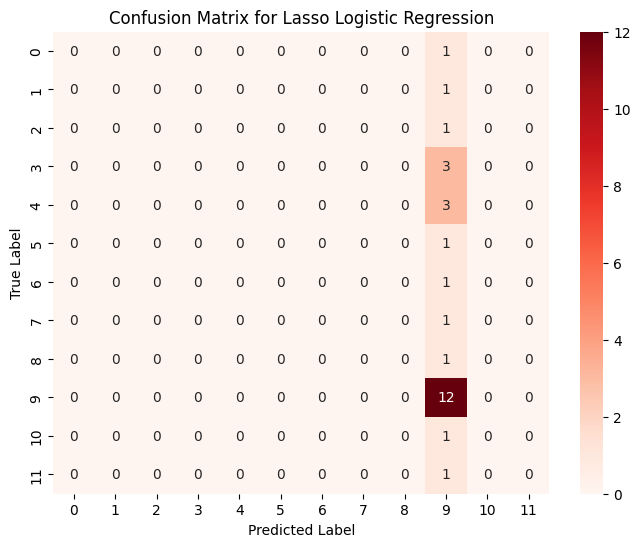

Model: Decision Tree
                                                                    precision    recall  f1-score   support

                                 DISTRACTION - FROM INSIDE VEHICLE       0.00      0.00      0.00         0
                                   DRIVING ON WRONG SIDE/WRONG WAY       0.00      0.00      0.00         1
                               DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       1.00      1.00      1.00         1
                            FAILING TO REDUCE SPEED TO AVOID CRASH       1.00      1.00      1.00         1
                                     FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         3
                                             FOLLOWING TOO CLOSELY       1.00      1.00      1.00         3
                   HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)       0.00      0.00      0.00         1
                                                  IMPROPER BACKING       1.00      1.00      1.00         1
      

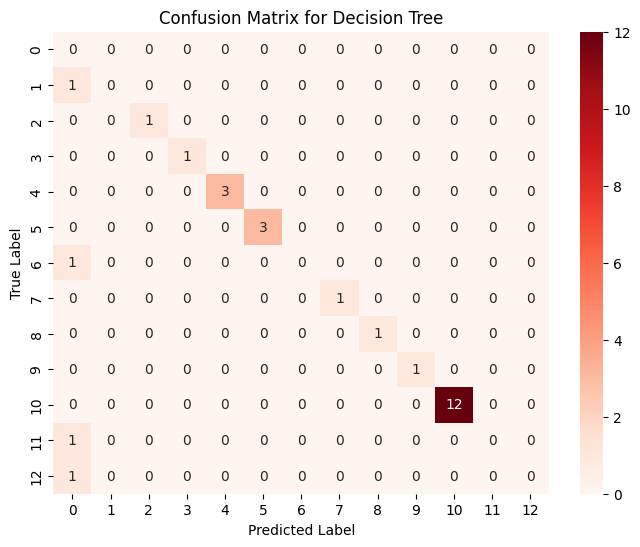

Model: Random Forest
                                                                    precision    recall  f1-score   support

                                   DRIVING ON WRONG SIDE/WRONG WAY       0.00      0.00      0.00         1
                               DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       0.00      0.00      0.00         1
                                     EQUIPMENT - VEHICLE CONDITION       0.00      0.00      0.00         0
                            FAILING TO REDUCE SPEED TO AVOID CRASH       1.00      1.00      1.00         1
                                     FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         3
                                             FOLLOWING TOO CLOSELY       0.75      1.00      0.86         3
                   HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)       0.00      0.00      0.00         1
                                                  IMPROPER BACKING       0.00      0.00      0.00         1
      

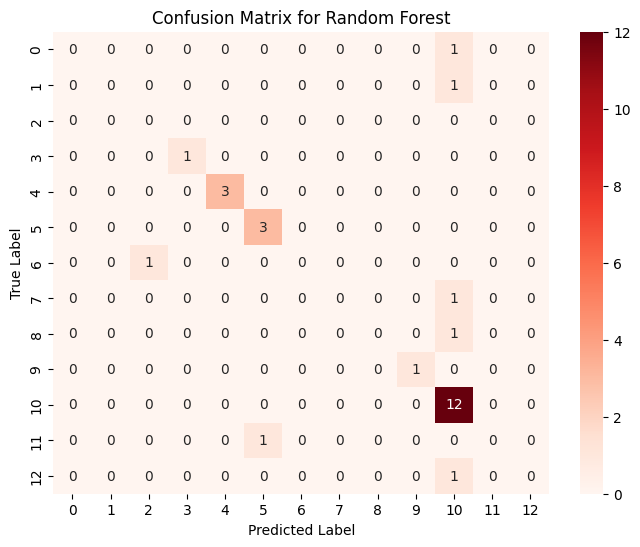

Model: Gradient Boosting
                                                                    precision    recall  f1-score   support

                                   DRIVING ON WRONG SIDE/WRONG WAY       0.00      0.00      0.00         1
                               DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       1.00      1.00      1.00         1
                                     EQUIPMENT - VEHICLE CONDITION       0.00      0.00      0.00         0
                            FAILING TO REDUCE SPEED TO AVOID CRASH       1.00      1.00      1.00         1
                                     FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         3
                                             FOLLOWING TOO CLOSELY       1.00      1.00      1.00         3
                   HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)       0.00      0.00      0.00         1
                                                  IMPROPER BACKING       1.00      1.00      1.00         1
  

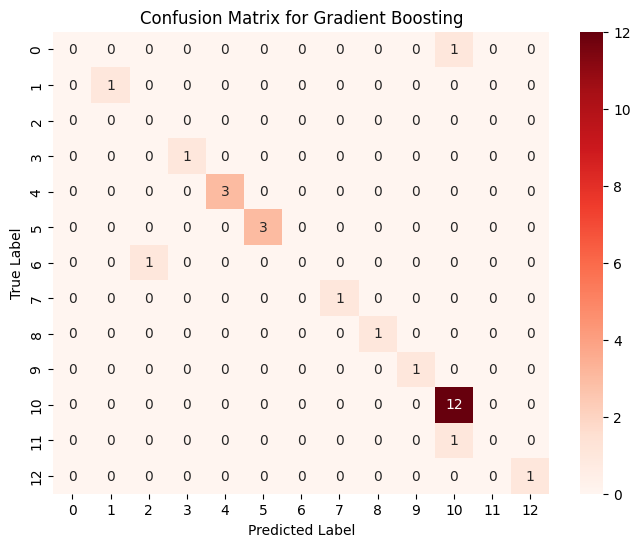

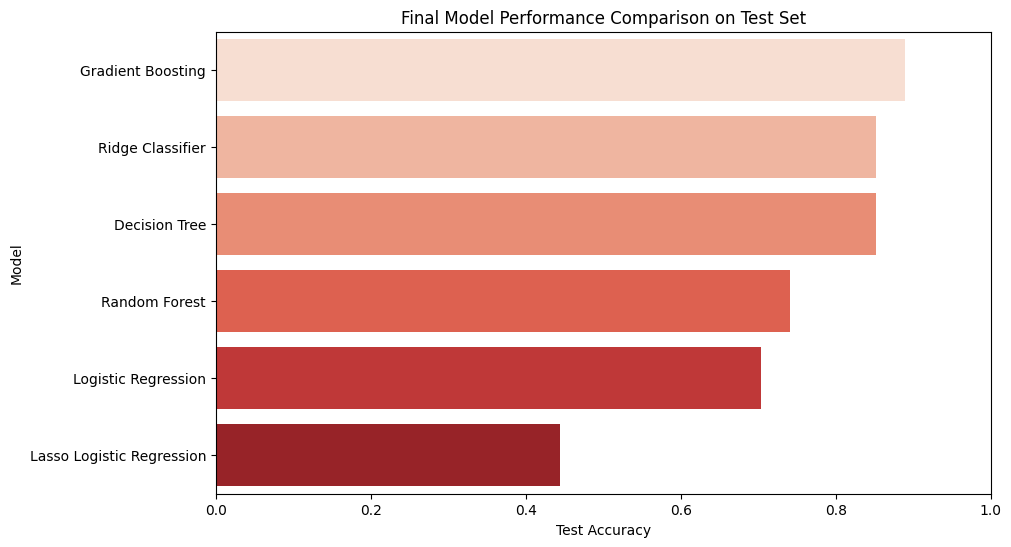

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

final_results = {}

for name, model in best_models.items():

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    final_results[name] = accuracy

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))


    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Create a dataframe for final results
final_results_df = pd.DataFrame(list(final_results.items()), columns=['Model', 'Test Accuracy'])

# Sort results
final_results_df = final_results_df.sort_values(by='Test Accuracy', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y='Model', data=final_results_df, palette='Reds')
plt.title('Final Model Performance Comparison on Test Set')
plt.xlabel('Test Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

## Evaluation
From the previous cell, we assessed our models using various classification metrics as stated below.

1. Accuracy:
2. Precision:
3. Recall:  
4. F1-Score:  
5. Confusion Matrix:  

Below we shall evaluate the best model to suit our case.

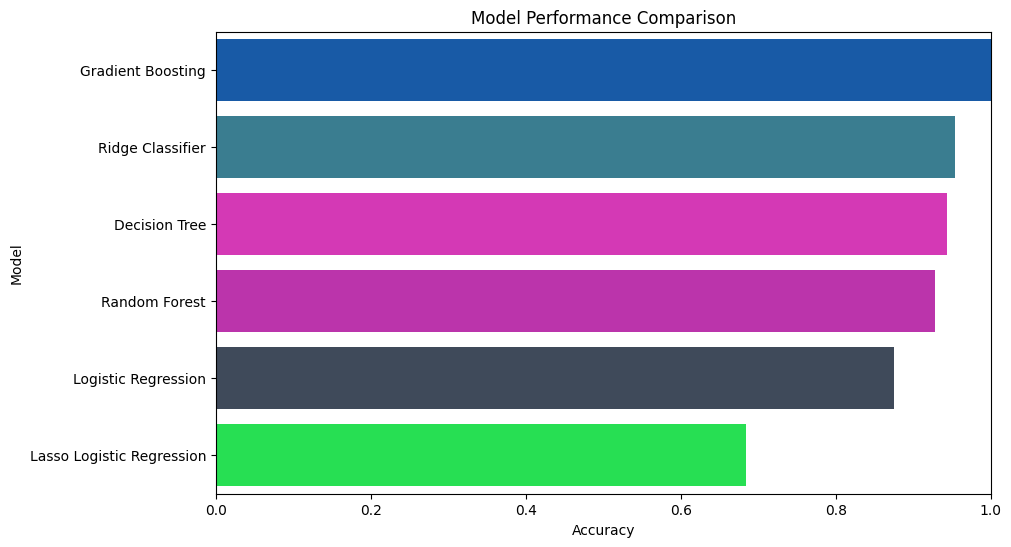

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model data
model_names = ['Logistic Regression', 'Ridge Classifier', 'Lasso Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
model_scores = [0.8755, 0.9543, 0.6842, 0.9441, 0.9276, 1.000]
performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': model_scores
})

# Sort by accuracy
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

# Custom random colors
import random
random_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(model_names))]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=performance_df, palette=random_colors)
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()


# Best model in our case as indicated on the chart is Gradient Boosting

Gradient Boosting emerged as the top-performing model for this problem primarily due to the large size of the dataset. It leverages the strengths of ensemble learning and the flexibility of Decision Trees, enabling it to capture complex non-linear relationships, handle feature interactions effectively, and generalize well to unseen data. Additionally, its performance was further optimized through hyperparameter tuning, which likely contributed to its superior results compared to the other models.

## Recommendations

Policy Adjustments: Modify traffic regulations and safety measures based on observed patterns, such as enhancing signage or enforcing speed limits in high-risk zones.

Enhanced Traffic Monitoring: Focus on targeted interventions in areas with high accident rates, addressing the identified contributory factors to mitigate risks effectively.

Model Deployment: Deploy the top-performing model in a real-time traffic monitoring system to deliver proactive alerts and help reduce accident rates.

Further Research: Expand this analysis by incorporating more recent data and additional features, such as vehicle types and driver demographics, to improve model accuracy and insights.






